# **Machine Learning with XGboost**

## **The Dataset**

The session's dataset is a CSV file named `hotel_bookings_clean.csv`, which contains data on hotel bookings. 

### **Acknowledgements**
The dataset was downloaded on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand/). The data is originally from an article called [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) by Nuno Antonio, Ana de Almeida, and Luis Nunes. It was then cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md). For the purposes of this live training, it was further pre-processed to have cleaner ready-to-use features (e.g., dropping irrelevant columns, one-hot-encoding). The dataset has the following [license](https://creativecommons.org/licenses/by/4.0/).

### **Data Dictionary**

It contains the **53 columns**:

_For binary variables: `1` = true and `0` = false._

#### **Target** 
- `is_cancelled`: Binary variable indicating whether a booking was canceled

#### **Features** 
- `lead time`: Number of days between booking date and arrival date
- `arrival_date_week_number`, `arrival_date_day_of_month`, `arrival_date_month`: Week number, day date, and month number of arrival date 
- `stays_in_weekend_nights`, `stays_in_week_nights`: Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked
- `adults`,`children`,`babies`: Number of adults, children, babies booked for the stay
- `is_repeated_guest`: Binary variable indicating whether the customer was a repeat guest 
- `previous_cancellations`: Number of prior bookings that were canceled by the customer
- `previous_bookings_not_canceled`: Number of prior bookings that were not canceled by the customer
- `required_car_parking_spaces`: Number of parking spaces requested by the customer
- `total_of_special_requests`: Number of special requests made by the customer
- `avg_daily_rate`: Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `booked_by_company`: Binary variable indicating whether a company booked the booking
- `booked_by_agent`: Binary variable indicating whether an agent booked the booking
- `hotel_City`: Binary variable indicating whether the booked hotel is a "City Hotel"
- `hotel_Resort`: Binary variable indicating whether the booked hotel is a "Resort Hotel"
- `meal_BB`: Binary variable indicating whether a bed & breakfast meal was booked 
- `meal_HB`: Binary variable indicating whether a half board meal was booked
- `meal_FB`: Binary variable indicating whether a full board meal was booked 
- `meal_No_meal`: Binary variable indicating whether there was no meal package booked 
- `market_segment_Aviation`, `market_segment_Complementary`, `market_segment_Corporate`, `market_segment_Direct`, `market_segment_Groups`, `market_segment_Offline_TA_TO`, `market_segment_Online_TA`, `market_segment_Undefined`: Indicates market segment designation with a value of `1`. "TA"= travel agent, "TO"= tour operators
- `distribution_channel_Corporate`, `distribution_channel_Direct`, `distribution_channel_GDS`, `distribution_channel_TA_TO`, `distribution_channel_Undefined`: Indicates booking distribution channel with a value of `1`. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System
- `reserved_room_type_A`,`reserved_room_type_B`, `reserved_room_type_C`,`reserved_room_type_D`, `reserved_room_type_E`, `reserved_room_type_F`, `reserved_room_type_G`, `reserved_room_type_H`, `reserved_room_type_L`: Indicates code of room type reserved with a value of `1`. Code is presented instead of designation for anonymity reasons
- `deposit_type_No_Deposit`: Binary variable indicating whether a deposit was made
- `deposit_type_Non_Refund`: Binary variable indicating whether a deposit was made in the value of the total stay cost
- `deposit_type_Refundable`: Binary variable indicating whether a deposit was made with a value under the total stay cost 
- `customer_type_Contract`: Binary variable indicating whether the booking has an allotment or other type of contract associated to it 
- `customer_type_Group`: Binary variable indicating whether the booking is associated to a group 
- `customer_type_Transient`: Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking
- `customer_type_Transient-Party`: Binary variable indicating whether the booking is transient, but is associated to at least another transient booking

---



## **1. Data Preprocessing**

In [20]:
# Import libraries
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Read in the dataset
bookings = pd.read_csv('https://raw.githubusercontent.com/datacamp/Machine-Learning-With-XGboost-live-training/master/data/hotel_bookings_clean.csv')

# List out our columns
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [22]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='is_canceled'>

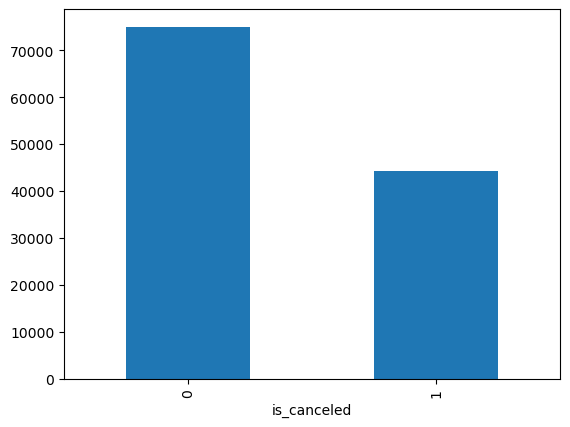

In [23]:
bookings['is_canceled'].value_counts().plot(kind='bar')

Remember for our binary variables, like `is_canceled`, `1` = true and `0` = false.

In [24]:
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()*100

is_canceled
0    62.923412
1    37.076588
Name: count, dtype: float64

#### **Correlation**

In [25]:
bookings.corr()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,...,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,...,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,...,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,...,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,...,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,...,0.036697,0.012479,-0.005421,0.113828,-0.114571,0.001789,0.102708,-0.007566,0.020028,-0.065740
stays_in_week_nights,0.025542,0.166892,0.016047,-0.028362,0.019739,0.494175,1.000000,0.096214,0.044651,0.020373,...,0.041310,0.016107,-0.005607,0.079174,-0.080321,0.006857,0.134339,-0.016898,0.007839,-0.065311
adults,0.058182,0.117575,0.026567,-0.001754,0.029239,0.094759,0.096214,1.000000,0.029416,0.017890,...,0.051264,0.105558,0.003792,0.030537,-0.031030,0.003091,0.020339,0.060427,0.091906,-0.116878
children,0.004862,-0.037886,0.005559,0.014541,0.005483,0.046134,0.044651,0.029416,1.000000,0.023999,...,0.392982,0.156345,-0.001851,0.097132,-0.096833,-0.006769,-0.018143,-0.006600,0.096220,-0.092929
babies,-0.032569,-0.021003,0.010417,-0.000235,0.010193,0.018607,0.020373,0.017890,0.023999,1.000000,...,0.031676,0.005121,-0.000579,0.030677,-0.030484,-0.003012,-0.000197,0.000535,0.021613,-0.022945


<Axes: >

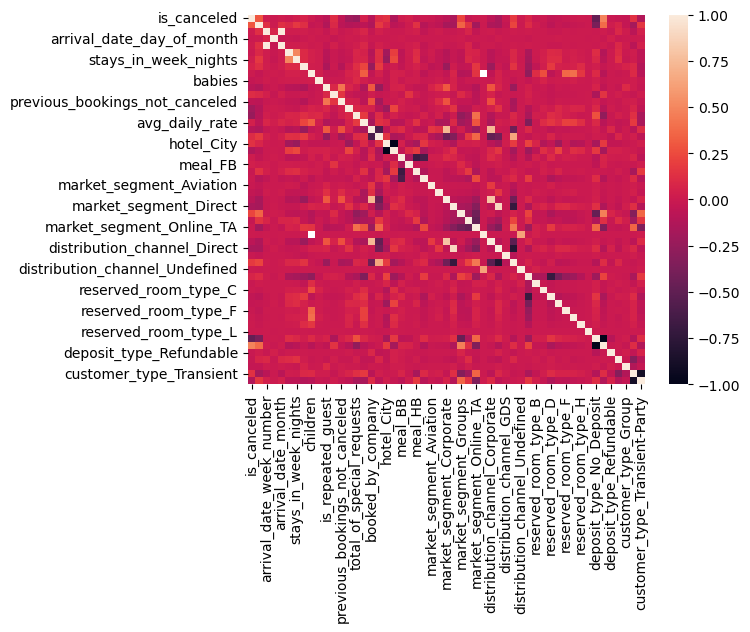

In [26]:
sns.heatmap(bookings.corr(numeric_only=True))

In [27]:
bookings.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_Non_Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA_TO        0.176005
hotel_City                        0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

### **Splitting data**

In [28]:
X=bookings.drop("is_canceled",axis=1)
y=bookings['is_canceled']

## **What is XGBoost?**

In [29]:
"""
# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(50))
y = np.sin(2 * np.pi * X) + np.random.randn(50) * 0.1

# Initial prediction
pred0 = np.mean(y)
residuals0 = y - pred0

# First plot: data and initial prediction
plt.figure()
plt.scatter(X, y)
plt.axhline(pred0)
plt.title("Data and Initial Prediction (Constant)")
plt.xlabel("Feature X")
plt.ylabel("Target y")


# Second plot: residuals
plt.figure()
plt.scatter(X, residuals0)
plt.axhline(0)
plt.title("Residuals after Initial Prediction")
plt.xlabel("Feature X")
plt.ylabel("Residual (y - pred0)")


plt.show()
"""

'\n# Generate synthetic data\nnp.random.seed(0)\nX = np.sort(np.random.rand(50))\ny = np.sin(2 * np.pi * X) + np.random.randn(50) * 0.1\n\n# Initial prediction\npred0 = np.mean(y)\nresiduals0 = y - pred0\n\n# First plot: data and initial prediction\nplt.figure()\nplt.scatter(X, y)\nplt.axhline(pred0)\nplt.title("Data and Initial Prediction (Constant)")\nplt.xlabel("Feature X")\nplt.ylabel("Target y")\n\n\n# Second plot: residuals\nplt.figure()\nplt.scatter(X, residuals0)\nplt.axhline(0)\nplt.title("Residuals after Initial Prediction")\nplt.xlabel("Feature X")\nplt.ylabel("Residual (y - pred0)")\n\n\nplt.show()\n'

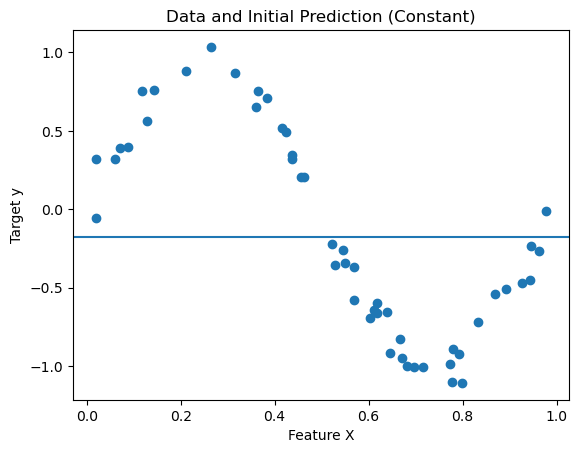
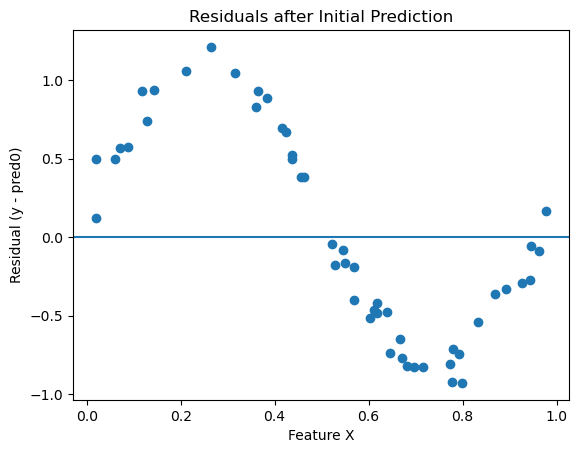

1. **Initialize**  
   - Set your model’s prediction for every example to the same constant, usually the average of all targets:  
     $\hat y_i^{(0)} = \bar y \;=\;\frac{1}{n}\sum_{i=1}^n y_i.$

2. **Compute Residuals (Pseudo-Gradients)**  
   - For each sample \(i\), compute the difference between true target and current prediction:  
     $r_i^{(t)} = y_i - \hat y_i^{(t-1)}.$
   - In gradient‐boosting terminology, $r_i^{(t)}$ is the negative gradient of the loss (for squared error it is exactly the residual).  

3. **Fit a Weak Learner to Residuals**  
   - Grow a small decision tree $f_t(x)$ to predict $\{r_i^{(t)}\}$.  
   - The tree is chosen to minimize squared error on the residuals (or, in general, to maximize the second-order gain).

4. **Update the Ensemble**  
   - Add this new tree (scaled by a learning rate $\eta$ into the model:  
     $\hat y_i^{(t)} = \hat y_i^{(t-1)} + \eta\,f_t(x_i).$

5. **Repeat**  
   - Go back to step 2 with the updated predictions, compute new residuals, fit another tree, and so on—typically for $T$ rounds or until convergence.

---

### Pseudocode (High-Level)

```python
# 1. Initialization
predictions = [ mean(y) ] * n_samples  # in math: predictions[i] = \hat y_i^{(0)} = (1/n)\sum_i y_i

# 2. For t = 1 to T do:
for t in range(1, T+1):
    # 2a. Compute residuals: r_i = y_i - \hat y_i^{(t-1)}
    residuals = y - predictions

    # 2b. Fit weak learner f_t to residuals
    tree_t = TrainTree(X, residuals)

    # 2c. Update predictions: \hat y_i^{(t)} = \hat y_i^{(t-1)} + \eta f_t(x_i)
    predictions += eta * tree_t.predict(X)

# 3. Return the ensemble of trees
return ensemble_of_trees


# For Classification?

---


## 1. Loss Function  

  $
    \ell(y, p) \;=\; -\bigl[y\log p + (1-y)\log(1-p)\bigr], 
    \quad p = \sigma(f)=\frac{1}{1+e^{-f}}
  $


## 2. Initial Prediction  

  $\displaystyle f^{(0)} = \tfrac12\ln\frac{\sum_i y_i}{\sum_i (1-y_i)},$
  then $\hat p^{(0)}=\sigma\bigl(f^{(0)}\bigr)$ (the global positive‐class probability)


## 3. Gradients & Hessians  
| Aspect                  | Classification                      |
|-------------------------|-------------------------------------|
| **Gradient** $g_i$      | $ \hat p_i - y_i$                   |          
| **Hessian** $h_i$       | $\hat p_i\,(1-\hat p_i)$            |          


## 4. Tree Fitting Target    
  Fit to the pseudo-residuals (gradients) $g_i = \hat p_i - y_i$, using the corresponding $h_i$ for the split-gain.


## 5. Leaf Weight Computation  
→ **is identical** in regression and classification;


## 6. Update & Output  

  $
    f_i^{(t)} = f_i^{(t-1)} + \eta\,f_t(x_i),
    \quad
    \hat p_i^{(t)} = \sigma\bigl(f_i^{(t)}\bigr).
  $
  Final output is $\sigma\bigl(\sum_t \eta\,f_t(x)\bigr)$ (a probability).

---

## Summary 
- **Choice of initial constant** (mean vs. log-odds)  
- **Residual vs. gradient/hessian** as the tree’s target  
- **Final activation**: identity for regression, sigmoid for classification  
- **Loss-specific gradient/hessian** in the split-gain and weight update  



## **XGBoost Classifier**

XGBoost has a  [scikit-learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn), which is useful if you want to use different scikit-learn classes and methods on an XGBoost model (e.g.,`predict()`, `fit()`).  In this section, we'll try the API out with the `xgboost.XGBClassifier()` class and get a baseline accuracy for the rest of our work. So that our results are reproducible, we'll set the `random_state=123`.

As a reminder, gradient boosting sequentially trains weak learners where each weak learner tries to correct its predecessor's mistakes. First, we'll instantiate a simple XGBoost classifier without changing any of the other parameters, and we'll inspect the parameters that we haven't touched.

In [30]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

# Instatiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Some notes on the parameters:
- The `booster` parameter is `gbtree`.  This means the weak learners, or boosters, are decision trees in this model. `gbtree` is the default.
- The `objective` function, or loss function, is defined as `binary:logistic`.
`binary:logistic` is the default for classifiers. It is an actual probability
- `n_estimators` is the number of gradient boosted trees we want in our model. It's equivalent to the number of boosting rounds.
- `max_depth` is the maximum tree depth allowed.


In [31]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

In [32]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8133706151499746


### **Visualizing your XGBoost model**

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

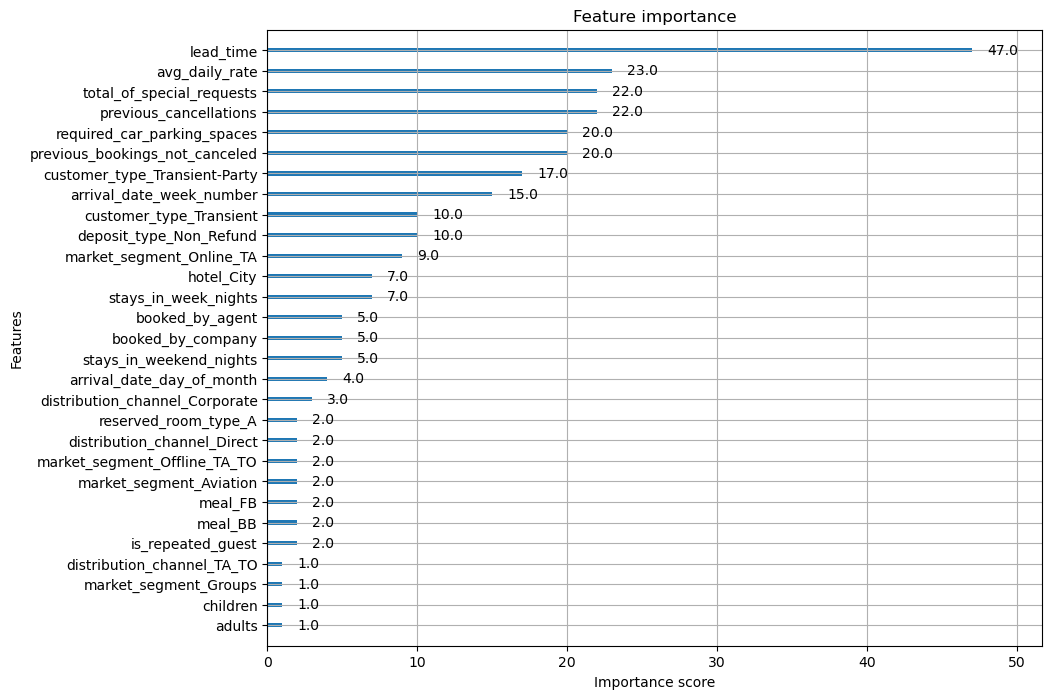

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

How is importance calculated? Here's an excerpt from the [documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting):

> **importance_type (str, default "weight") –**
> How the importance is calculated: either “weight”, “gain”, or “cover”
> - ”weight” is the number of times a feature appears in a tree
> - ”gain” is the average gain of splits which use the feature
> - ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

We'll focus on the first two. Gain is way to quantify how much a feature contributes to improving accuracy. Let's try out `gain` to see how it differs from `weight`.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

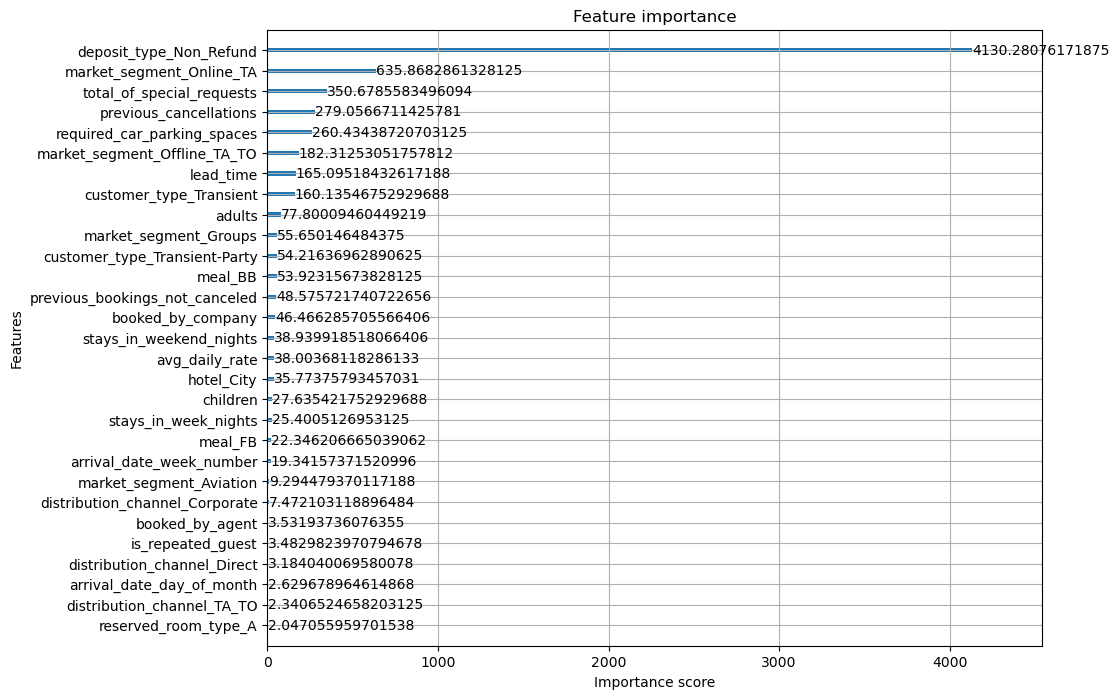

In [34]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

Here we see the ordering of features differs quite a bit between `gain` and `weight`! This implies that (1) feature importance can be subjective, and (2) the number of appearances a feature has on a tree is not necessarily correlated to how much gain it brings. For example, a binary variable has less of a chance to appear as many times as a continuous variable on a tree, since there are only two outputs. However, it can still be a powerful feature.

#### **Plotting a decision tree from your model**

<Axes: >

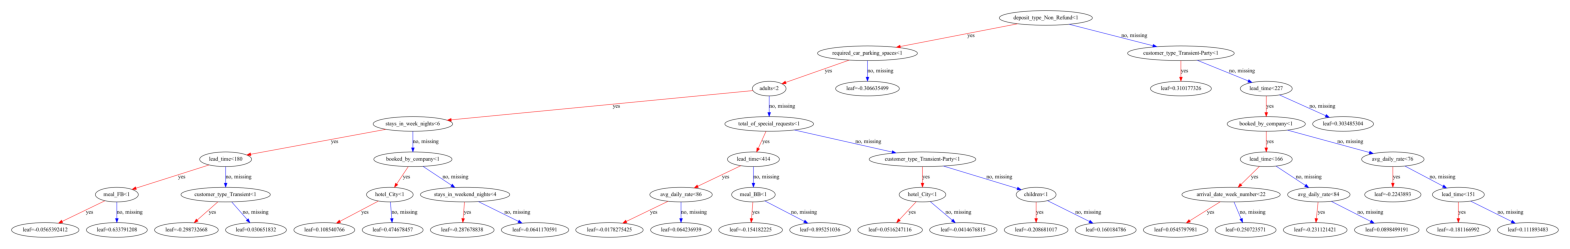

In [40]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# Plot the first tree
xgb.plot_tree(xgb_clf, tree_idx=9)

<Axes: >

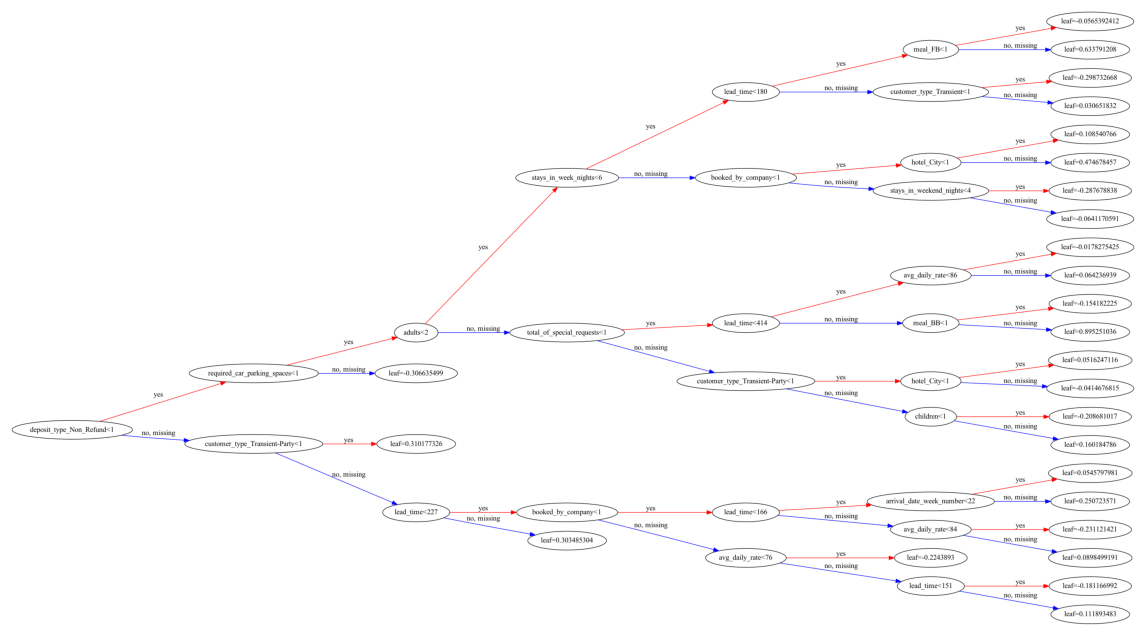

In [41]:
# Plot the last tree
xgb.plot_tree(xgb_clf, tree_idx=9, rankdir='LR')

## **Parameters**

Along with setting the number of boosting rounds and early stopping rounds, there are many other parameters for our tree booster. We can see this in the documentation for [parameters for tree booster](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster).

In this section, we'll take a look at several important parameters and understand what they do.

For this session's purpose, we'll use `XGBClassifier()` with **25 boosting** rounds to avoid long training times. 

In [64]:
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

### **Max depth**

_From XGBoost docs:_
> Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

Let's see what happens when we increase the `max_depth` from 3 to 10.


In [65]:
# Set max_depth to 10
xgb_clf.set_params(max_depth=10)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8349517031011693

### **colsample_bytree**

_From XGBoost docs:_

> The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

Essentially, this lets us limit the number of columns used when constructing each tree.


In [ ]:
# Set colsample_bytree to 0.5 
xgb_clf.set_params(colsample_bytree=0.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8303253685815963

We can also limit the number of columns used by every depth level or node of our tree.

_From XGBoost docs:_

> `colsample_bylevel` is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

> `colsample_bynode` is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

### **subsample**

_From XGBoost docs:_

> - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting. 
> - Subsampling will occur once in every boosting iteration.
> - range: (0,1]

Default is 1, let's try 0.75. 

This means each of our 25 trees will get a random sampling of 75% of our training data. Each tree will train on different portions of data which adds randomness (similar to `colsample_bytree`). 


In [ ]:
# Set subsample to 0.75 
xgb_clf.set_params(subsample=0.75)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8271479410269446

### **gamma**

_From XGBoost docs:_
> - Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
> - range: [0,∞]


This decides whether a node will split based on the expected loss reduction loss after the split. `gamma` represents the minimum loss reduction required for a node to split.


Increasing `gamma` = less splits = less complexity

The default is 0, so in our case, nodes have always split until the maximum depth. Let's increase it to 0.25.




In [ ]:
# Set gamma to .25 
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8272241992882562

### **Learning Rate (aka eta)**

_From XGBoost docs:_
> - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
> - range: [0,1]

The learning rate affects how quickly a model learns.

In [66]:
# Set learning rate to .3 
xgb_clf.set_params(learning_rate=0.3)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8349517031011693

The learning rate and the number of trees should be tuned together. If we decrease the learning rate, we need to make sure we have enough trees to learn something and avoid severely underfitting. **Therefore, a low learning will require more boosting rounds.**

### **reg_alpha**

_From XGBoost docs:_
> L1 regularization term on weights. Increasing this value will make model more conservative.

L1 is often referred to as **lasso regression**. It's a foundational regularization technique, meaning it aims to reduce overfitting by discouraging complex models. In the case of gradient boosting, L1 does this by adding penalties on leaf weights. Increasing `alpha` drives base learners' leaf weights towards 0.

Default is 0, meaning there is no alpha regularization in our model currently. Let's activate L1 with a value of `0.01`.

In [ ]:
# set reg_alpha to .1 
xgb_clf.set_params(reg_alpha=0.01)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8361209964412811

**L2**, aka ridge regression, is also available with the parameter `reg_lambda`. L2 is known for having smoother penalty then L1. This means leaf weights smoothly decrease rather with less risk of sparsity in the leaf weights. So, make sure to try our different regularization techniques! 

Let's take a look at our resulting parameters after we manually changed them.

In [67]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## **Hyperparameter tuning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.2s
[CV] END